# Introduction

## Save As a Csv

#### Preparing the ground 

##### Install and import necessary libraries

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

##### ploty configurations

In [3]:
import plotly.express as px
import plotly.offline as py
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_dark"
py.init_notebook_mode(connected=True)

#### Path specified

In [4]:
DATA_DIR = 'data'
LABEL_DIR = 'label.csv'
IMAGE_DIR = os.path.join(DATA_DIR, 'DaanForestPark')

#### Label record 

In [5]:
label_df = pd.read_csv(LABEL_DIR, names=['dirpath', 'target'])
label_df.head()

,dirpath,target
0,DaanForestPark/20180330/1lZsRrQzj,通泉草
1,DaanForestPark/20180330/4PdXwYcGt,紫花酢漿草
2,DaanForestPark/20180330/6VrmeiUE5,通泉草
3,DaanForestPark/20180330/7nrSoiuHL,通泉草
4,DaanForestPark/20180330/7RKdkJLgy,通泉草


#### Encode the target using categorical labeling

In [6]:
label_df['label'] = label_df.target.astype('category').cat.codes
label_df.head()

,dirpath,target,label
0,DaanForestPark/20180330/1lZsRrQzj,通泉草,66
1,DaanForestPark/20180330/4PdXwYcGt,紫花酢漿草,51
2,DaanForestPark/20180330/6VrmeiUE5,通泉草,66
3,DaanForestPark/20180330/7nrSoiuHL,通泉草,66
4,DaanForestPark/20180330/7RKdkJLgy,通泉草,66


#### How many categories ?

In [7]:
label_df['label'].nunique()

85

#### The distribution of actual labels

In [9]:
label_df['label'].max(),label_df['label'].min()

(84, 0)

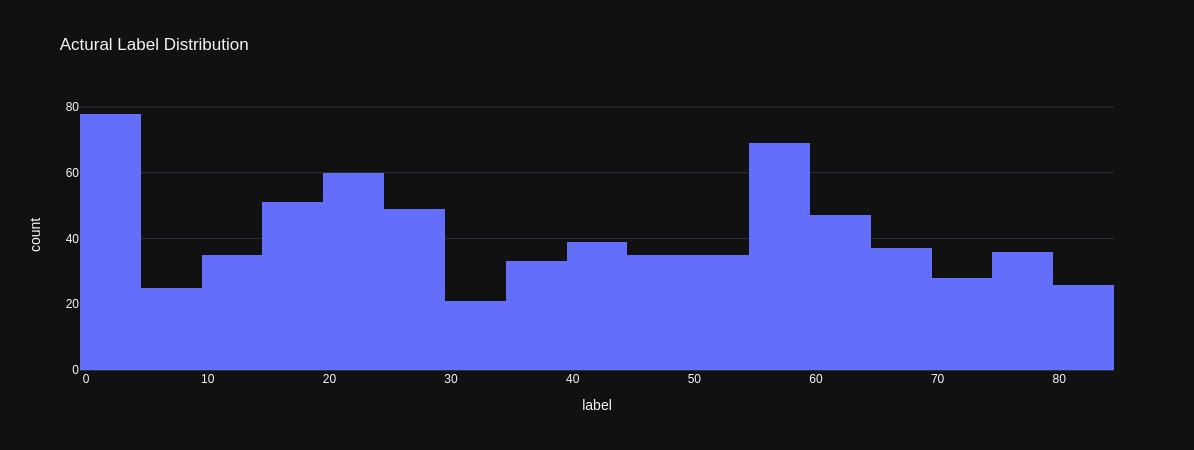

In [7]:
fig = px.histogram(label_df,
                   x="label",
                   title='Actural Label Distribution',
                   hover_data=label_df.columns)
fig.show()

#### Check the list includes all species in DaanForestPark

In [8]:
actual_labels_set = set(label_df['dirpath'])
including, excluding = [], set()
trainsetlabels_dis = []
for subdir, dirs, files in tqdm(os.walk(IMAGE_DIR)):
    dirpath = subdir[len(DATA_DIR)+1:]
    if dirpath in actual_labels_set:
        including.append(dirpath)
        trainsetlabels_dis.append(
            label_df.loc[label_df['dirpath']==dirpath, 'label'].values[0])
    else:
        for filename in files:
            if filename.endswith(('jpg')):
                excluding.add(dirpath)

779it [00:00, 2717.87it/s]


In [9]:
len(including), len(excluding)

(704, 60)

##### Peek the excluded set

In [10]:
excluding

{'DaanForestPark/20180328/00JiXc7Li',
 'DaanForestPark/20180328/1fEl0PORf',
 'DaanForestPark/20180328/2ESqiMx1W',
 'DaanForestPark/20180328/2K8CmiRXJ',
 'DaanForestPark/20180328/2rmKz9jun',
 'DaanForestPark/20180328/4ZV2mm246',
 'DaanForestPark/20180328/4d226WzOt',
 'DaanForestPark/20180328/5Hh92vwCj',
 'DaanForestPark/20180328/5YaDba3Rk',
 'DaanForestPark/20180328/7EUKxpgmi',
 'DaanForestPark/20180328/7aE0svrDB',
 'DaanForestPark/20180328/8ki6u8mRp',
 'DaanForestPark/20180328/9QDNnuvXS',
 'DaanForestPark/20180328/9mzgB1mce',
 'DaanForestPark/20180328/A5oxb5tt6',
 'DaanForestPark/20180328/A9M7LhXWr',
 'DaanForestPark/20180328/ASuyBDCsU',
 'DaanForestPark/20180328/Cm0PGaFuB',
 'DaanForestPark/20180328/E34J9pshg',
 'DaanForestPark/20180328/F5eoIX3gF',
 'DaanForestPark/20180328/GVSG0FATa',
 'DaanForestPark/20180328/GtlUAArKQ',
 'DaanForestPark/20180328/GwHozfKCv',
 'DaanForestPark/20180328/HOlmU0zRV',
 'DaanForestPark/20180328/INlKFKjYm',
 'DaanForestPark/20180328/LWlyzcxvm',
 'DaanForest

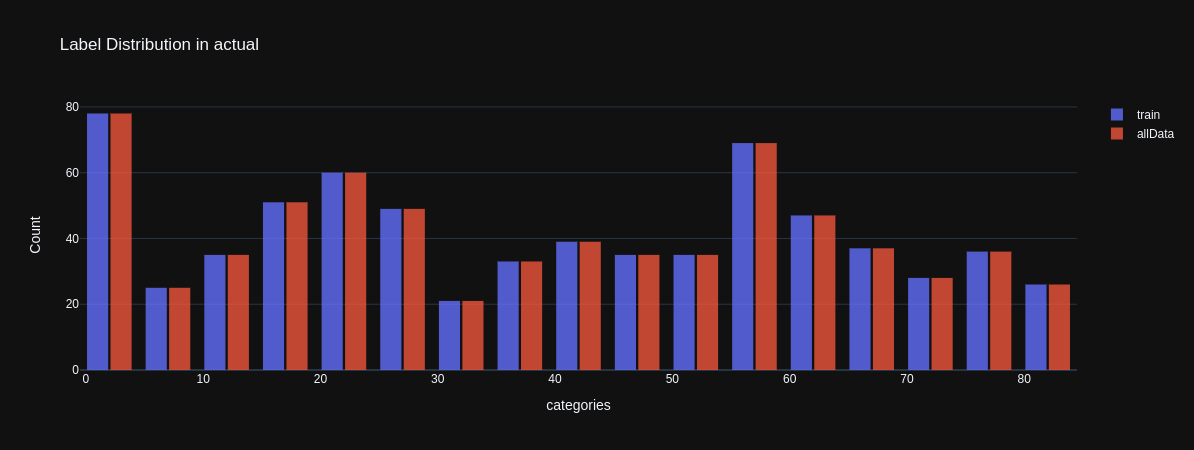

In [11]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=trainsetlabels_dis,name='train'))
fig.add_trace(go.Histogram(x=label_df['label'],name='allData'))
fig.update_layout(title_text='Label Distribution in actual',
                xaxis_title_text='categories', # xaxis label
                yaxis_title_text='Count', # yaxis label
                bargap=0.2, # gap between bars of adjacent location coordinates
                bargroupgap=0.1 # gap between bars of the same location coordinates
                )
fig.update_traces(opacity=0.8)
fig.show()

#### Finally, save a new one with encoding-label

In [12]:
# label_df.to_csv('label2.csv',index=False)